In [1]:
import sys
sys.path.append("../src")
from precomputed_dataset import precomputedDataset

import torch
from torch_geometric.loader import DataLoader as PyGDataLoader

# Dataset setup
h5_path = "500samples.h5"
train_dataset = precomputedDataset(h5_path)

# DataLoader - use PyG's DataLoader for graph data
# Smaller batch for overfitting test to see per-sample behavior
batch_size = 10
loader = PyGDataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,  # Shuffle even for overfitting to avoid order effects
    num_workers=0)#,  # 0 for debugging, increase later
 

# Collect node features from multiple samples
node_features_list = []
edge_features_list = []

for i in range(min(100, len(train_dataset))):
    #Append Feature to a list
    data = train_dataset[i]
    node_features_list.append(data.x)
    edge_features_list.append(data.edge_attr)

# Stack and analyze
all_node_feats = torch.cat(node_features_list, dim=0)  # [N_total, F_node]
all_edge_feats = torch.cat(edge_features_list, dim=0)  # [E_total, F_edge]

print("Node feature statistics across dataset:")
print(f"  Mean: {all_node_feats.mean(dim=0)}")
print(f"  Std:  {all_node_feats.std(dim=0)}")  # <-- KEY METRIC
print(f"  Min:  {all_node_feats.min(dim=0).values}")
print(f"  Max:  {all_node_feats.max(dim=0).values}")

print("\nEdge feature statistics across dataset:")
print(f"  Mean: {all_edge_feats.mean(dim=0)}")
print(f"  Std:  {all_edge_feats.std(dim=0)}")  # <-- KEY METRIC
print(f"  Min:  {all_edge_feats.min(dim=0).values}")
print(f"  Max:  {all_edge_feats.max(dim=0).values}")

Node feature statistics across dataset:
  Mean: tensor([-5.8208e-11,  1.4901e-10,  5.7232e-01, -1.7195e-02, -2.0027e-03,
         2.4239e-01])
  Std:  tensor([0.2283, 0.2426, 0.2498, 0.6966, 0.7175, 0.1138])
  Min:  tensor([-0.4889, -0.5676,  0.0848, -1.0000, -0.9986,  0.0149])
  Max:  tensor([0.4460, 0.4715, 1.0000, 0.9947, 0.9997, 0.6289])

Edge feature statistics across dataset:
  Mean: tensor([ 2.2802e-02, -4.8068e-11,  4.3330e-01,  1.1536e-10,  3.8455e-11,
        -3.1919e-02])
  Std:  tensor([0.1225, 0.1188, 0.2032, 0.6975, 0.7166, 0.6954])
  Min:  tensor([-0.5469, -0.4854,  0.0817, -1.0000, -1.0000, -1.0000])
  Max:  tensor([0.5959, 0.4854, 1.0000, 1.0000, 1.0000, 1.0000])


(array([   57.,  1849.,  9785., 16855., 21054., 21054., 16855.,  9785.,
         1849.,    57.]),
 array([-0.04955574, -0.0396446 , -0.02973345, -0.0198223 , -0.00991115,
         0.        ,  0.00991115,  0.0198223 ,  0.02973345,  0.0396446 ,
         0.04955574]),
 <BarContainer object of 10 artists>)

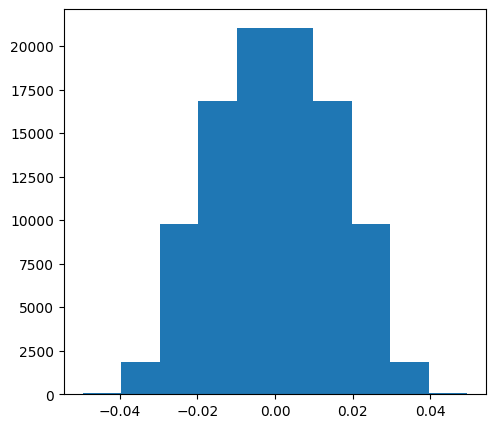

In [ ]:
autopowerimag mean e-20, std e-19, min e-18, max e-18
autopowerreal mean e-2, std e-3, min e-2, max e-2